COMP-3704 (241552) Neural Networks and Deep Learning
Assignment 1: Concrete Strength Regression
Group 3: Felix, Elizer, Francisco  

Objective:
To estimate the compressive strength of concrete based on components and age using multilinear regression.

Data:
Obtained from UCI Machine Learning Repository: Concrete Compressive Strength Data Set and used in I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998). 

Problem Statement:
Structural engineers need to know the strength of materials in order to design safe structures. As a machine learning developer working for an engineering company, your job is to analyze data to develop a model that predicts the compressive strength of concrete based on what it is made of and how old the concrete is. The model must also provide an uncertainty in the strength prediction so that engineers can ensure that the design is safe.

Data
A - Load Concrete_Data_Yeh.csv into a pandas dataframe. 
Print out the header. 
Use pandas.DataFrame.describe to summarize the data. 
Using markdown, explain the meaning of each column and make observations about the dataset.

In [35]:
#import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#supress warnings
import warnings
warnings.filterwarnings("ignore")

In [36]:
#importing libraries for machine learning model
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [37]:
# Import database using github link
url = "https://raw.githubusercontent.com/Fcazarez/Unsupervised_Machine_Learning/main/Concrete_Data_Yeh.csv"
df = pd.read_csv(url, encoding="unicode_escape")
# take a look at the data
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [38]:
#look at null count and dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [39]:
#look at distribution of data
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [40]:
# duplicate rows
duplicates = df[df.duplicated()]
print("\n\n--> Duplicate Rows:")
display(duplicates.style)
print(len(duplicates), 'duplicated values were found!')



--> Duplicate Rows:


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
77,425.000000,106.300000,0.000000,153.500000,16.500000,852.100000,887.100000,3,33.400000
80,425.000000,106.300000,0.000000,153.500000,16.500000,852.100000,887.100000,3,33.400000
86,362.600000,189.000000,0.000000,164.900000,11.600000,944.700000,755.800000,3,35.300000
88,362.600000,189.000000,0.000000,164.900000,11.600000,944.700000,755.800000,3,35.300000
91,362.600000,189.000000,0.000000,164.900000,11.600000,944.700000,755.800000,3,35.300000
100,425.000000,106.300000,0.000000,153.500000,16.500000,852.100000,887.100000,7,49.200000
103,425.000000,106.300000,0.000000,153.500000,16.500000,852.100000,887.100000,7,49.200000
109,362.600000,189.000000,0.000000,164.900000,11.600000,944.700000,755.800000,7,55.900000
111,362.600000,189.000000,0.000000,164.900000,11.600000,944.700000,755.800000,7,55.900000
123,425.000000,106.300000,0.000000,153.500000,16.500000,852.100000,887.100000,28,60.290000


25 duplicated values were found!


In [41]:
# droping duplicated values
print('--> Processed data_df')
df = df.drop_duplicates()
print(len(duplicates), 'duplicated values were removed, ', len(df),' values remain!')


--> Processed data_df
25 duplicated values were removed,  1005  values remain!


B - Use pandas.DataFrame.info to check if the entries are the correct datatype, and if there are any missing values. 
Use pandas.DataFrame.duplicates to check for duplicate entries. 
Fix the dataset so that there are no missing values, duplicate rows, or incorrect data types.
Use markdown to make observations and explain what you have done. 

C - Use seaborn.heatmap to display the correlation matrix of the features. 
Use seaborn.pairplot to generate scatter plots and histograms. 
Use markdown to make observations and comment on which features are most correlated with compressive strength.

In [42]:
# Correlation

corrmat = df.corr()
corrmat

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
flyash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplasticizer,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarseaggregate,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fineaggregate,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
csMPa,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


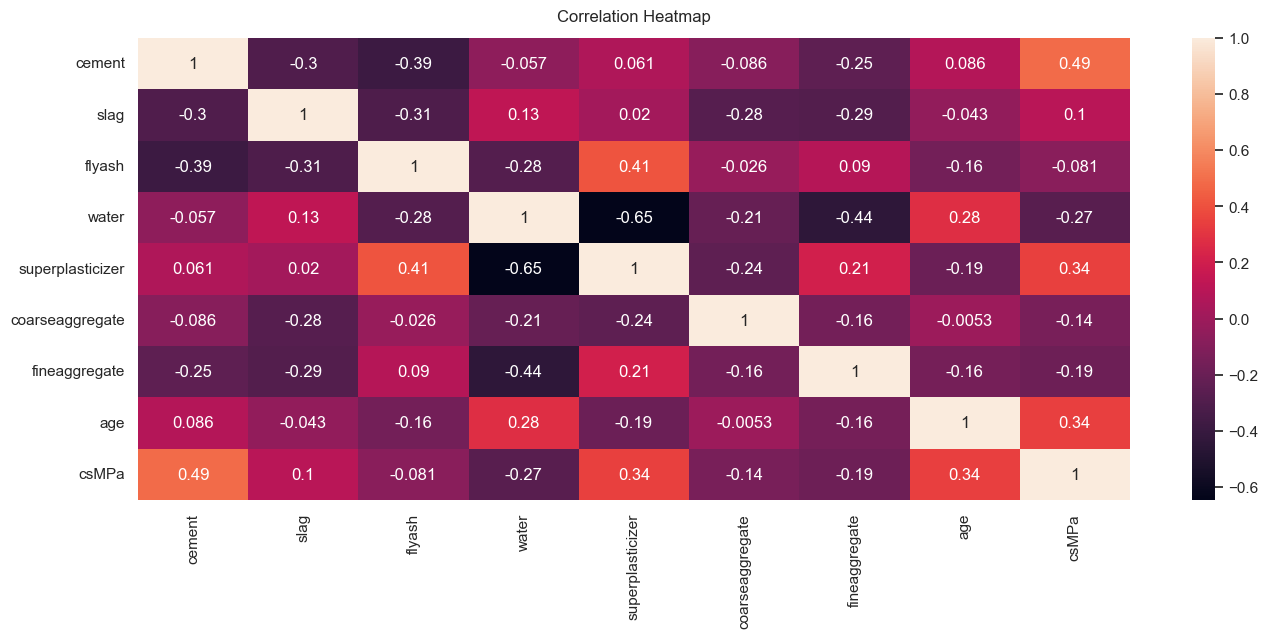

In [43]:
#heat map to display the correlation matrix of the features
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [44]:
#create bins from compressive strength
bins = pd.qcut(df['csMPa'], q=4)

#add bins to concrete df
df['bins']=bins

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


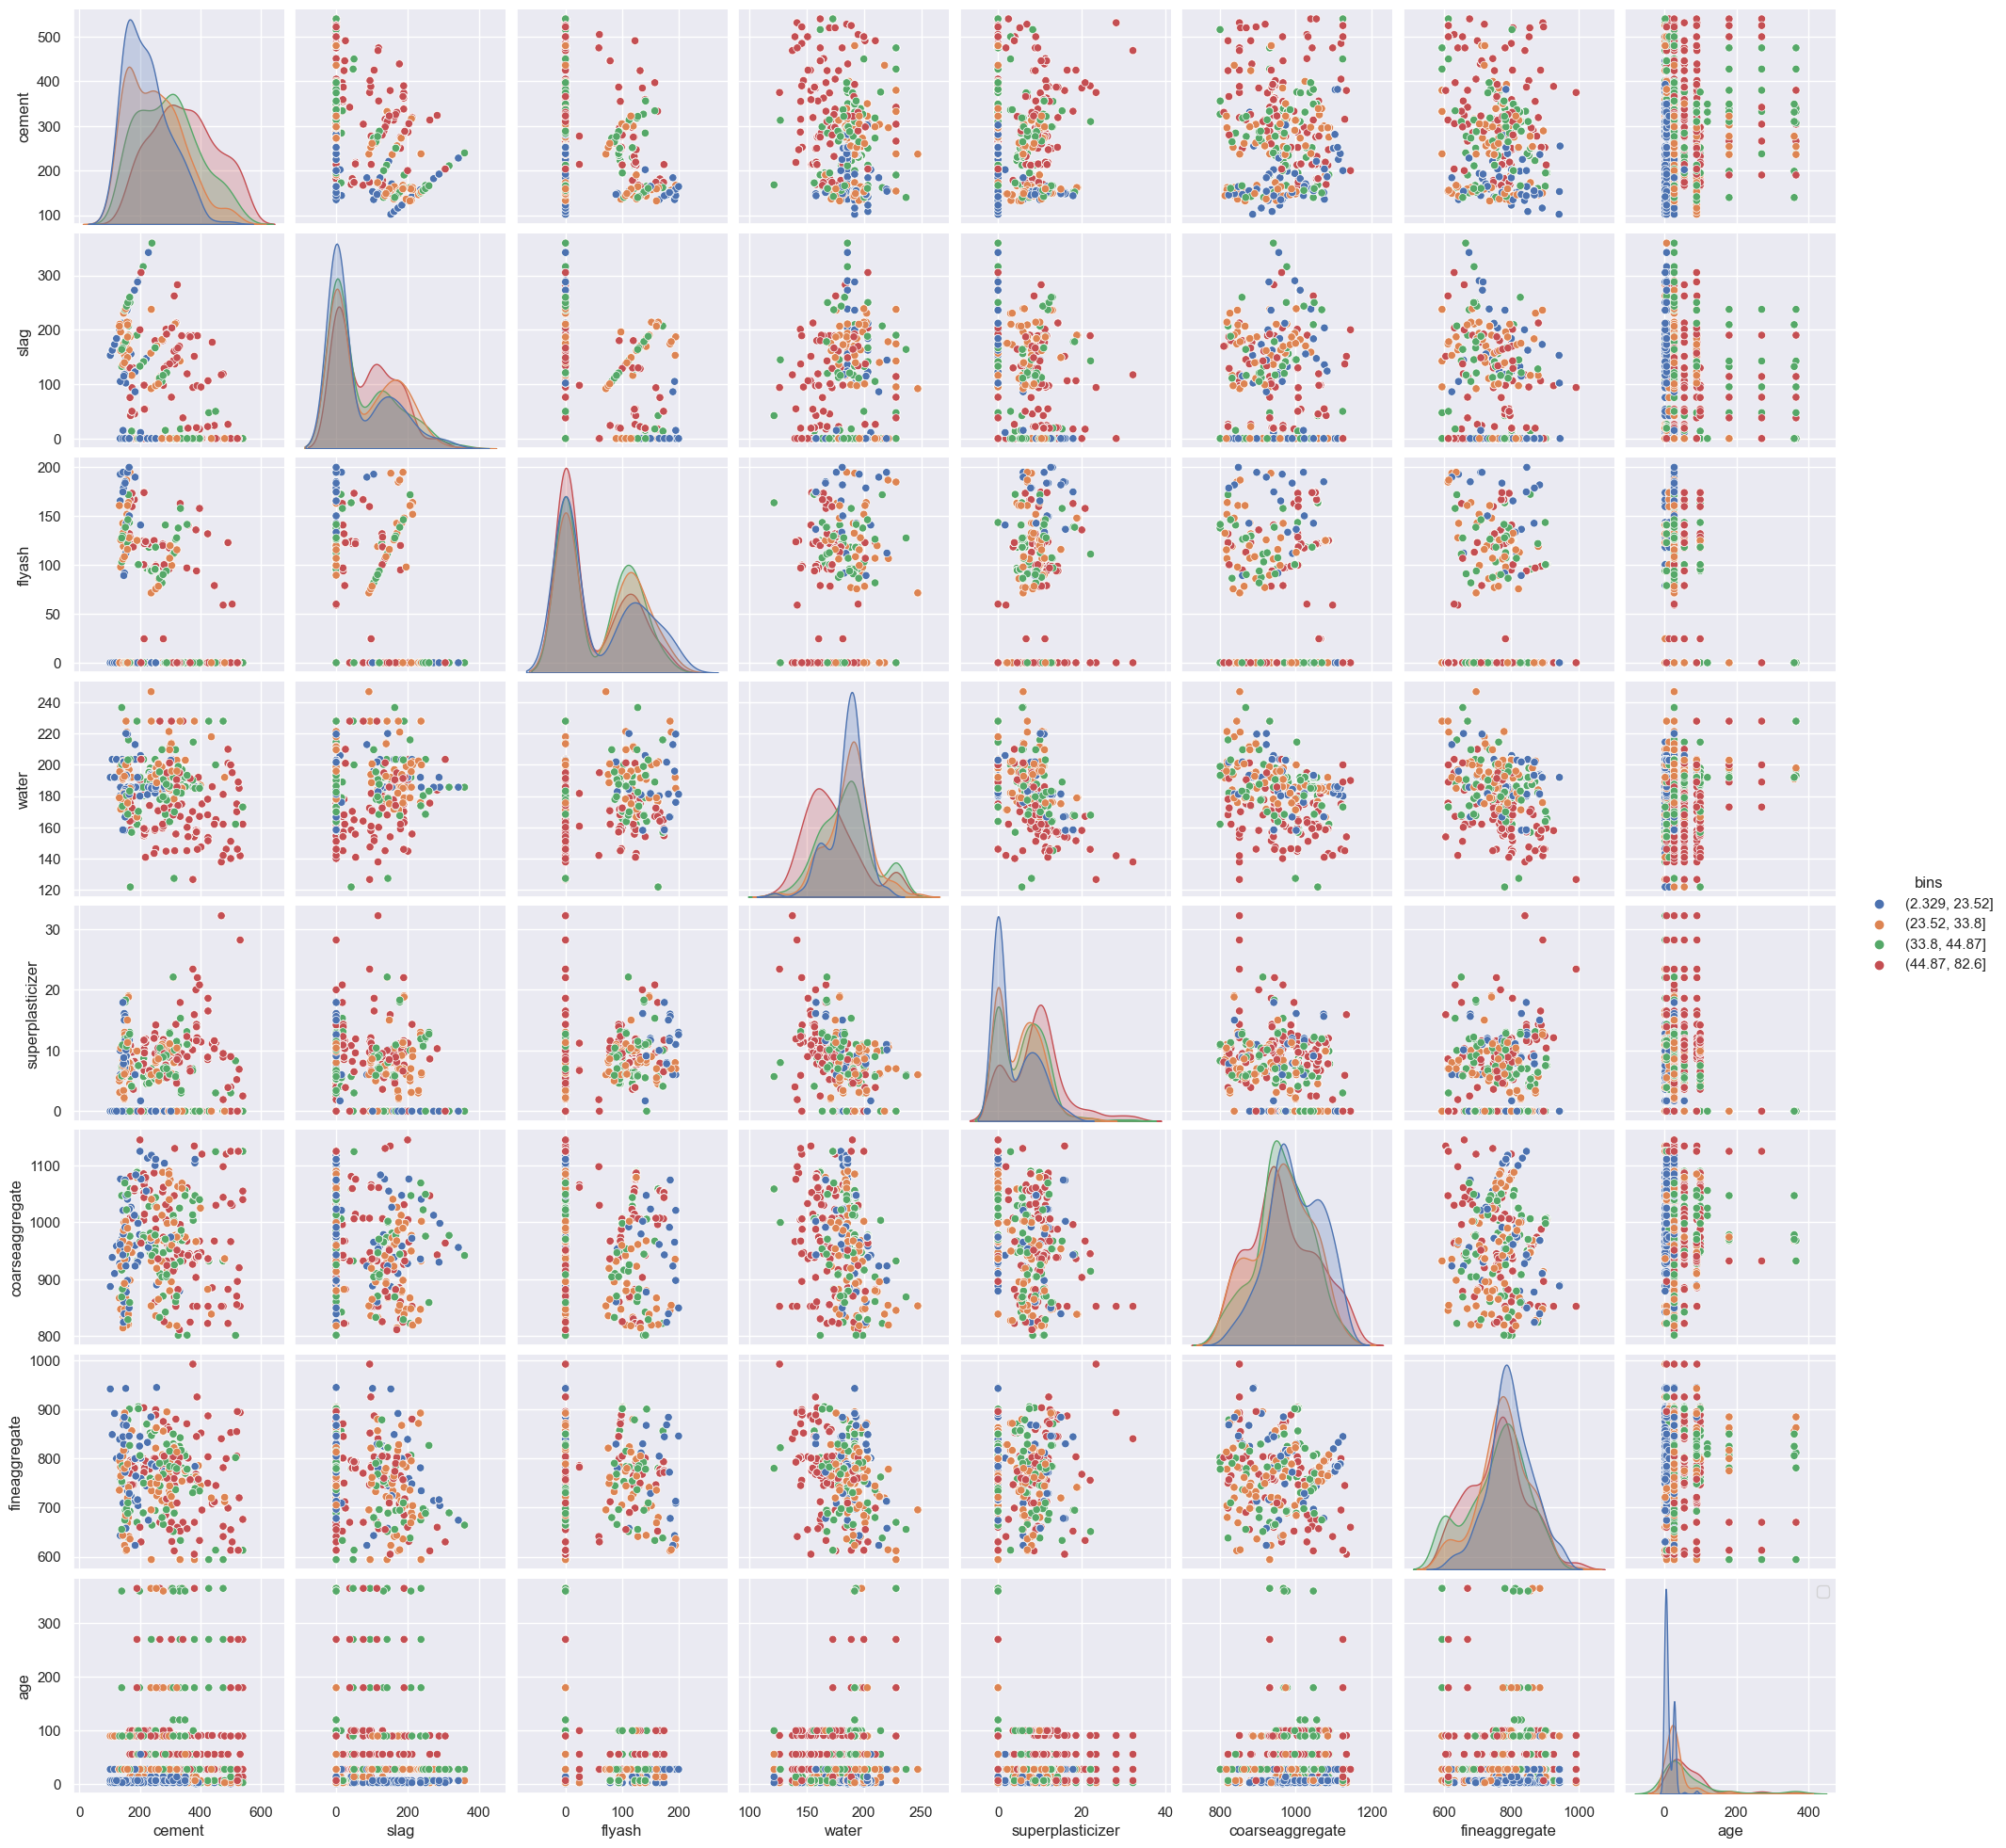

In [45]:
#look at how target is distributed among variables
sns.pairplot(df.loc[:, (df.columns != 'csMPa')], hue='bins')
plt.legend()
plt.show()

D - Move the labels to a separate dataframe. Use sklearn.preprocessing.MinMaxScaler to scale the features (but not the labels). Split the data so that 10% is used for testing and 90% for training.

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

features = df[['cement', 'slag', 'flyash', 'water', 'superplasticizer',
                    'coarseaggregate', 'fineaggregate', 'age']]
labels = df['csMPa']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the features (but not the labels)
scaled_features = scaler.fit_transform(features)

# Split the data into training (90%) and testing (10%) sets
x_train, x_test, y_train, y_test = train_test_split(
    scaled_features, labels, test_size=0.1, random_state=31)

MODELING
 (Hint: refer to Exercise 2.02 for help with these steps but note that here we are doing regression while the exercise is on classification, so there are some significant differences.)

A - For both the train and test datasets, save the csMPA column (the label y) as a 2d tensorflow variable and the other columns (the features x) as a separate 2d tensorflow variable

In [47]:
import tensorflow as tf
import numpy as np

# Set random seed for TensorFlow and NumPy for reproducibility
tf.random.set_seed(31)
np.random.seed(31)

#Saving csMPA and features as 2d tensorflow variable for train / test datasets
x_train = tf.Variable(x_train, dtype=tf.float32)
y_train = tf.Variable(y_train.values.reshape(-1,1), dtype=tf.float32)

x_test = tf.Variable(x_test, dtype=tf.float32)
y_test = tf.Variable(y_test.values.reshape(-1,1), dtype=tf.float32)


B - Use tf.zeros to create tensorflow variables of the appropriate shape for the weights (w) and bias (b).

In [14]:
#Use 8 features
number_features = 8
number_units = 1

#Calculating weight and bias with tensorflow
weight = tf.Variable(tf.zeros([number_features, number_units]))
bias = tf.Variable(tf.zeros([number_units]))

C - Write a regression function to implement the equation z = xw + b
and return the value z. (This is similar to the perceptron function in Exercise 2.02, but without the extra step of using tf.sigmoid. Note that multilinear regression is similar to a perceptron but does not use an activation function.)

In [15]:
#regression function
def regression(x, weight, bias):
  z = tf.add(tf.matmul(x, weight), bias)
  return z

D - Write a loss function as a lambda function that calculates y-y^ where 
y is the label and Y^ is the prediction.

In [16]:
#Mean Absolute Error (MAE) loss function
loss_function = lambda y, y_pred: tf.reduce_mean(tf.abs(y - y_pred))

E - Write a train function that uses tf.optimizer.SGD to minimize the loss with respect to w and b. Choose an appropriate learning rate. Train a model for at least 1000 epochs on training data.

In [17]:
#Training model
def train_model(x_train, y_train, num_epochs, learning_rate):
  optimizer = tf.optimizers.SGD(learning_rate)

  for epoch in range(num_epochs):
    # record all the operations that occur within the indented block
    with tf.GradientTape() as tape:
      predictions = regression(x_train,weight,bias)
      current_loss = loss_function(y_train, predictions)

    # Compute gradients
    gradients = tape.gradient(current_loss, [weight, bias])

    # Update variables using the optimizer
    optimizer.apply_gradients(zip(gradients, [weight, bias]))

    # Print the loss every 100 epochs (optional)
    if (epoch + 1) % 100 == 0:
      print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {current_loss.numpy()}")

  return weight, bias

# Train the model with the specified number of epochs (1000) and learning rate (0.01)
trained_weights, trained_bias = train_model(x_train, y_train, num_epochs=1000, learning_rate=0.01)

Epoch 100/1000, Loss: 33.13962936401367
Epoch 200/1000, Loss: 31.13029670715332
Epoch 300/1000, Loss: 29.144887924194336
Epoch 400/1000, Loss: 27.206098556518555
Epoch 500/1000, Loss: 25.384014129638672
Epoch 600/1000, Loss: 23.712787628173828
Epoch 700/1000, Loss: 22.2596492767334
Epoch 800/1000, Loss: 20.97780418395996
Epoch 900/1000, Loss: 19.869970321655273
Epoch 1000/1000, Loss: 18.87933349609375


F - Print out the trained weights and bias. Use the regression function you wrote to predict the strength for each row of test data. Write a function to find the root-mean-squared-error of the predictions and use it to print out the RMSE of the model.

In [18]:
# Print out the trained weights and bias
print("--> Trained Weights:")
print(trained_weights.numpy().flatten())

print("------------------------\n",
      "-->Trained Bias:")
print(trained_bias.numpy().flatten())

--> Trained Weights:
[3.7852407 1.7808241 2.4478645 4.273379  1.7181864 4.451878  3.874516
 1.2333013]
------------------------
 -->Trained Bias:
[8.899653]


In [19]:
#Use the trained weights and bias to make predictions on the test data
y_pred = regression(x_test, trained_weights, trained_bias)

#Convert the TensorFlow tensor to a NumPy array for easier manipulation (optional)
y_pred = y_pred.numpy()

#Print the predicted strengths
print("-->Predicted Strengths for Test Data:")
print(y_pred.flatten())

-->Predicted Strengths for Test Data:
[18.651669 18.421053 18.330208 18.026363 17.130623 17.634241 16.594208
 16.865667 17.319084 18.515923 18.643593 18.264591 19.891026 16.933271
 17.641312 18.329151 18.503593 18.78795  18.148903 18.829437 17.782017
 18.108585 18.430614 17.009426 17.469288 16.582674 18.25737  18.158737
 19.089993 18.366173 20.138119 18.947918 18.707916 17.448555 17.025103
 17.363852 18.537361 16.713608 17.657623 17.96282  17.222046 17.958755
 18.726822 16.615349 17.4025   17.365576 17.367695 17.432514 17.284462
 17.496475 18.307802 18.80943  17.178009 18.4361   17.292233 18.537218
 18.562641 17.40623  17.199356 17.633385 18.530972 17.375425 17.755901
 16.96489  18.065186 18.76752  18.60421  18.46561  16.961117 17.746819
 17.792278 18.934818 17.93166  17.067059 17.896347 18.25118  17.252941
 17.844345 18.49171  18.10358  18.622875 18.077797 17.251575 18.161148
 17.880985 18.356834 18.073204 18.719559 18.293411 17.973011 17.500296
 17.334984 18.736374 18.26839  18.16710

In [20]:
#RMSE function
def rmse(y_test, y_pred):
    rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
    return rmse

# Calculate RMSE between true labels (y_test) and predicted labels (y_pred)
rmse = rmse(y_test, y_pred)

# Print out the RMSE of the model
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 25.089375


CONCLUSION

A - Use your model to make predictions on the test data.

In [21]:
# print prediction on test set
y_pred.flatten()

array([18.651669, 18.421053, 18.330208, 18.026363, 17.130623, 17.634241,
       16.594208, 16.865667, 17.319084, 18.515923, 18.643593, 18.264591,
       19.891026, 16.933271, 17.641312, 18.329151, 18.503593, 18.78795 ,
       18.148903, 18.829437, 17.782017, 18.108585, 18.430614, 17.009426,
       17.469288, 16.582674, 18.25737 , 18.158737, 19.089993, 18.366173,
       20.138119, 18.947918, 18.707916, 17.448555, 17.025103, 17.363852,
       18.537361, 16.713608, 17.657623, 17.96282 , 17.222046, 17.958755,
       18.726822, 16.615349, 17.4025  , 17.365576, 17.367695, 17.432514,
       17.284462, 17.496475, 18.307802, 18.80943 , 17.178009, 18.4361  ,
       17.292233, 18.537218, 18.562641, 17.40623 , 17.199356, 17.633385,
       18.530972, 17.375425, 17.755901, 16.96489 , 18.065186, 18.76752 ,
       18.60421 , 18.46561 , 16.961117, 17.746819, 17.792278, 18.934818,
       17.93166 , 17.067059, 17.896347, 18.25118 , 17.252941, 17.844345,
       18.49171 , 18.10358 , 18.622875, 18.077797, 

In [22]:
features_data = pd.DataFrame(x_test, columns=features.columns)
pred_y = pd.DataFrame({'prediction_csMPa': y_pred.flatten()})
actual_y = pd.DataFrame({'actual_csMPa': y_test.numpy().flatten()})
compare_data = pd.concat([pred_y, actual_y, features_data], axis=1)
# show prediction and actual csMpa with features together
compare_data

,prediction_csMPa,actual_csMPa,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,18.651669,34.770000,"tf.Tensor(0.65068495, shape=(), dtype=float32)","tf.Tensor(0.055648305, shape=(), dtype=float32)","tf.Tensor(0.46976513, shape=(), dtype=float32)","tf.Tensor(0.28115016, shape=(), dtype=float32)","tf.Tensor(0.36024845, shape=(), dtype=float32)","tf.Tensor(0.39825583, shape=(), dtype=float32)","tf.Tensor(0.62970394, shape=(), dtype=float32)","tf.Tensor(0.0054945056, shape=(), dtype=float32)"
1,18.421053,63.139999,"tf.Tensor(0.4, shape=(), dtype=float32)","tf.Tensor(0.2721202, shape=(), dtype=float32)","tf.Tensor(0.12243878, shape=(), dtype=float32)","tf.Tensor(0.3107029, shape=(), dtype=float32)","tf.Tensor(0.3478261, shape=(), dtype=float32)","tf.Tensor(0.75784886, shape=(), dtype=float32)","tf.Tensor(0.47290516, shape=(), dtype=float32)","tf.Tensor(0.07417583, shape=(), dtype=float32)"
2,18.330208,14.200000,"tf.Tensor(0.44292238, shape=(), dtype=float32)","tf.Tensor(0.0, shape=(), dtype=float32)","tf.Tensor(0.0, shape=(), dtype=float32)","tf.Tensor(0.56070286, shape=(), dtype=float32)","tf.Tensor(0.0, shape=(), dtype=float32)","tf.Tensor(0.8255814, shape=(), dtype=float32)","tf.Tensor(0.4290015, shape=(), dtype=float32)","tf.Tensor(0.016483517, shape=(), dtype=float32)"
3,18.026363,46.799999,"tf.Tensor(0.7374429, shape=(), dtype=float32)","tf.Tensor(0.29577073, shape=(), dtype=float32)","tf.Tensor(0.0, shape=(), dtype=float32)","tf.Tensor(0.23642172, shape=(), dtype=float32)","tf.Tensor(0.57763976, shape=(), dtype=float32)","tf.Tensor(0.39244187, shape=(), dtype=float32)","tf.Tensor(0.52609134, shape=(), dtype=float32)","tf.Tensor(0.016483517, shape=(), dtype=float32)"
4,17.130623,52.450001,"tf.Tensor(0.48150685, shape=(), dtype=float32)","tf.Tensor(0.44657764, shape=(), dtype=float32)","tf.Tensor(0.0, shape=(), dtype=float32)","tf.Tensor(0.4456869, shape=(), dtype=float32)","tf.Tensor(0.29813665, shape=(), dtype=float32)","tf.Tensor(0.33604652, shape=(), dtype=float32)","tf.Tensor(0.4152032, shape=(), dtype=float32)","tf.Tensor(0.07417583, shape=(), dtype=float32)"
...,...,...,...,...,...,...,...,...,...,...
96,16.831385,51.860001,"tf.Tensor(0.23173515, shape=(), dtype=float32)","tf.Tensor(0.84947133, shape=(), dtype=float32)","tf.Tensor(0.0, shape=(), dtype=float32)","tf.Tensor(0.6525559, shape=(), dtype=float32)","tf.Tensor(0.0, shape=(), dtype=float32)","tf.Tensor(0.47209302, shape=(), dtype=float32)","tf.Tensor(0.09031611, shape=(), dtype=float32)","tf.Tensor(0.2445055, shape=(), dtype=float32)"
97,17.918110,8.060000,"tf.Tensor(0.08584475, shape=(), dtype=float32)","tf.Tensor(0.5826377, shape=(), dtype=float32)","tf.Tensor(0.0, shape=(), dtype=float32)","tf.Tensor(0.56070286, shape=(), dtype=float32)","tf.Tensor(0.0, shape=(), dtype=float32)","tf.Tensor(0.71511626, shape=(), dtype=float32)","tf.Tensor(0.5341194, shape=(), dtype=float32)","tf.Tensor(0.0054945056, shape=(), dtype=float32)"
98,17.622423,33.689999,"tf.Tensor(0.47488585, shape=(), dtype=float32)","tf.Tensor(0.39788535, shape=(), dtype=float32)","tf.Tensor(0.55472267, shape=(), dtype=float32)","tf.Tensor(0.36900958, shape=(), dtype=float32)","tf.Tensor(0.6832298, shape=(), dtype=float32)","tf.Tensor(0.32848838, shape=(), dtype=float32)","tf.Tensor(0.1430005, shape=(), dtype=float32)","tf.Tensor(0.07417583, shape=(), dtype=float32)"
99,18.464020,23.639999,"tf.Tensor(0.586758, shape=(), dtype=float32)","tf.Tensor(0.05286589, shape=(), dtype=float32)","tf.Tensor(0.70464766, shape=(), dtype=float32)","tf.Tensor(0.2571885, shape=(), dtype=float32)","tf.Tensor(0.33850932, shape=(), dtype=float32)","tf.Tensor(0.4098837, shape=(), dtype=float32)","tf.Tensor(0.5193176, shape=(), dtype=float32)","tf.Tensor(0.0054945056, shape=(), dtype=float32)"


B -Write code to calculate the percentage of deviations y-y^ that are bigger than the RMSE.

In [31]:
def large_error_pecentage(y, y_hat, rmse):
        diff = np.abs(y - y_hat)
        total_large_errors = np.count_nonzero( diff > rmse)
        return (total_large_errors/len(y))

In [32]:
y = y_test.numpy().flatten()
y_hat = y_pred.flatten()
total_large_errors_pct = large_error_pecentage(y, y_hat, rmse)
print(f'The percentage of large error than rmse is {total_large_errors_pct: .2f}')

The percentage of large error than rmse is  0.32


C - Use markdown to comment on how well the model works to make predictions. What uncertainty would you provide to the structural engineers to go along with the strength predictions of the model? 

In [33]:
print(f'mean of actual csMPa in test data is {y.mean(): .2f}')

mean of actual csMPa in test data is  36.26


In conclusion, our data modeling analysis has yielded valuable insights into the prediction accuracy of csMPa. It is important to note that the root mean square error (RMSE) for csMPa prediction currently stands at 25, while the actual mean of the observed values is 36. These results indicate that the prediction accuracy falls short of our desired level of satisfaction.

Upon closer examination, we attribute this deviation to the limitation of the training dataset, which was constrained to a relatively low number of epochs (1,000). It is noteworthy that as we increased the number of epochs during training, we observed a marked reduction in RMSE when evaluated on the test dataset.

Furthermore, an intriguing observation arises from the distribution of errors, where we find that approximately 32% of errors exceed a threshold of 1 RMSE. This distribution hints at a potential Gaussian distribution of errors, which could inform our approach to establishing safety margins.

Based on our findings, we propose a practical recommendation for engineers. To ensure a 95% level of safety, we suggest considering an adjustment of the target csMPa value by adding 2 times the RMSE. For an even higher level of certainty, at 99% safety assurance, engineers may opt to add 3 times the RMSE to the target csMPa value.

This conclusion underscores the significance of robust data modeling and offers a pragmatic strategy to enhance the reliability of csMPa predictions, providing actionable insights for engineering applications.